In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.utils import shuffle
from sklearn import svm

In [ ]:
data = pd.read_csv('email.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data = data[data['Category'] != '{"mode":"full"']
data = data.drop_duplicates()

In [ ]:
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#balancing the data
data = data.reset_index(drop = True)
indexes = np.arange(0, data.shape[0])
np.random.seed(20)
np.random.shuffle(indexes)
shuffled_data = data.iloc[indexes]
shuffled_data

# Determine the indexes to delete
indexes_to_delete = []
n = shuffled_data['Category'].sum()
ham_count = 0
for i in range(0, shuffled_data.shape[0]):
    if shuffled_data['Category'][i] == 0:
        ham_count = ham_count + 1
        if ham_count > n:
            indexes_to_delete.append(i)


data = shuffled_data.drop(indexes_to_delete)

In [ ]:
x = data['Message']
y = data['Category']

In [ ]:
#Preprocessing message
cv = CountVectorizer()
x = cv.fit_transform(x)

In [ ]:
#Splitting the dataset in train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 42)

In [ ]:
model=svm.SVC(kernel='rbf')
model.fit(x_train, y_train)

SVC()

In [ ]:
y_pred= model.predict(x_train)

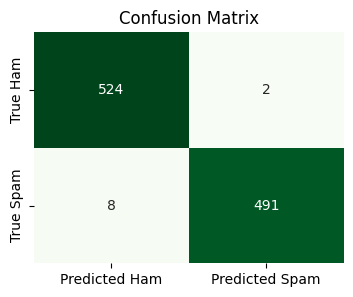

In [ ]:
#Confusion Matrix
matrix = confusion_matrix(y_train, y_pred)

plt.figure(figsize = (4, 3))
sns.heatmap(matrix, annot = True, fmt = 'd', cmap = 'Greens', cbar = False,
           xticklabels = ['Predicted Ham', 'Predicted Spam'],
           yticklabels = ['True Ham', 'True Spam'])
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#model evaluation
Accuracy=accuracy_score(y_train, y_pred)
Recall=recall_score(y_train, y_pred)
Precision=precision_score(y_train, y_pred)
print(Accuracy)
print(Recall)
print(Precision)

0.9902439024390244
0.9839679358717435
0.9959432048681541


In [ ]:
x1=["offer flat 50% off","Team meeting rescheduled to 2 PM","Congratulations! You've won a prize.","Congratulations! You have got the job"]
x1=cv.transform(x1)
y_pred_1=model.predict(x1)
for prediction in (y_pred_1):
    label = "Spam" if prediction == 1 else "Ham"
    print(f"Prediction: {label}")


Prediction: Ham
Prediction: Ham
Prediction: Ham
Prediction: Ham


**rrrr**

In [ ]:
data = pd.read_csv('email.csv')
data.head()
data = data[data['Category'] != '{"mode":"full"']
data = data.drop_duplicates()
data=pd.DataFrame(data)

In [ ]:
df_train, df_test = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
from collections import defaultdict
train_category_texts = defaultdict(str)
test_category_texts = defaultdict(str)

In [ ]:
for index, row in df_train.iterrows():
    message = row['Message']
    category = row['Category']
    train_category_texts[category] += ' ' + message.lower()

In [ ]:
for index, row in df_test.iterrows():
    message = row['Message']
    category = row['Category']
    test_category_texts[category] += ' ' + message.lower()

In [ ]:
import gzip

METHOD = gzip

original_sizes = {
    label: len(METHOD.compress(text.encode()))
    for label, text in train_category_texts.items()
}

print(original_sizes)

{'ham': 106651, 'spam': 24327}


In [ ]:
predictions=[]

for text in test_category_texts:

    sizes = {
        label: len(METHOD.compress(f'{label_text} {text.lower()}'.encode()))
        for label, label_text in test_category_texts.items()
    }

    predicted_label = min(
        sizes,
        key=lambda label: sizes[label] - original_sizes[label]
    )

    predictions.append(predicted_label)

In [ ]:
print(predictions)

['ham', 'ham']


In [ ]:
from sklearn.metrics import classification_report
test_category_texts=dict(test_category_texts)
test_category_texts=pd.DataFrame(list(test_category_texts.items()))
test= test_category_texts.columns.tolist()
print(test)

print(classification_report(
    test,
    predictions,
    digits=3
))

[0, 1]


ValueError: Found input variables with inconsistent numbers of samples: [2, 4712]

In [ ]:
'''from collections import defaultdict

label_texts = defaultdict(str)

for data_point in data:
    message = data_point['message']
    category = data_point['category']

    # Concatenate the text for the corresponding category
    label_texts[category] += ' ' + message.lower()
'''

KeyError: 'ham'

In [ ]:
from sklearn.datasets import fetch_20newsgroups

categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space'
]

train = fetch_20newsgroups(
    subset='train',
    categories=categories
)



AttributeError: head

In [ ]:
'''from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Step 1: Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.25, random_state=42)

# Step 3: Create a Naive Bayes classifier using a pipeline with TF-IDF vectorization
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Step 4: Train the model on the training set
model.fit(X_train, y_train)

# Step 5: Make predictions on the testing set
predictions = model.predict(X_test)

# Step 6: Evaluate the performance of the classifier
accuracy = metrics.accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# You can also print a classification report for more detailed metrics
print(metrics.classification_report(y_test, predictions, target_names=newsgroups.target_names))
'''

Accuracy: 0.65
                          precision    recall  f1-score   support

             alt.atheism       0.84      0.08      0.15       198
           comp.graphics       0.70      0.62      0.66       245
 comp.os.ms-windows.misc       0.68      0.62      0.65       242
comp.sys.ibm.pc.hardware       0.56      0.76      0.65       238
   comp.sys.mac.hardware       0.87      0.66      0.75       250
          comp.windows.x       0.88      0.79      0.84       260
            misc.forsale       0.84      0.59      0.70       241
               rec.autos       0.86      0.73      0.79       244
         rec.motorcycles       0.52      0.78      0.63       219
      rec.sport.baseball       0.96      0.75      0.85       261
        rec.sport.hockey       0.88      0.88      0.88       245
               sci.crypt       0.66      0.82      0.73       251
         sci.electronics       0.86      0.56      0.68       249
                 sci.med       0.90      0.67      0.77     

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Step 1: Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.25, random_state=42)

# Step 3: Create a Naive Bayes classifier using a pipeline with CountVectorizer
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Step 4: Train the model on the training set
model.fit(X_train, y_train)

# Step 5: Make predictions on the testing set
predictions = model.predict(X_test)

# Step 6: Evaluate the performance of the classifier
accuracy = metrics.accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# You can also print a classification report for more detailed metrics
print(metrics.classification_report(y_test, predictions, target_names=newsgroups.target_names))


Accuracy: 0.61
                          precision    recall  f1-score   support

             alt.atheism       0.66      0.24      0.35       198
           comp.graphics       0.49      0.73      0.59       245
 comp.os.ms-windows.misc       0.73      0.03      0.06       242
comp.sys.ibm.pc.hardware       0.55      0.73      0.63       238
   comp.sys.mac.hardware       0.83      0.59      0.69       250
          comp.windows.x       0.68      0.78      0.73       260
            misc.forsale       0.87      0.52      0.65       241
               rec.autos       0.89      0.64      0.74       244
         rec.motorcycles       0.48      0.57      0.52       219
      rec.sport.baseball       0.98      0.64      0.78       261
        rec.sport.hockey       0.93      0.80      0.86       245
               sci.crypt       0.55      0.79      0.65       251
         sci.electronics       0.83      0.50      0.62       249
                 sci.med       0.83      0.74      0.78     

In [ ]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Download NLTK stopwords
nltk.download('stopwords')

# Step 1: Load the 20 Newsgroups dataset
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.25, random_state=42)

# Step 3: Create a custom tokenizer using NLTK for CountVectorizer
stop_words = set(stopwords.words('english'))

def custom_tokenizer(text):
    tokens = nltk.word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return tokens

# Step 4: Create a Naive Bayes classifier using a pipeline with CountVectorizer
model = make_pipeline(CountVectorizer(tokenizer=custom_tokenizer), MultinomialNB(alpha=0.1))

# Step 5: Train the model on the training set
model.fit(X_train, y_train)

# Step 6: Make predictions on the testing set
predictions = model.predict(X_test)

# Step 7: Evaluate the performance of the classifier
accuracy = metrics.accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# You can also print a classification report for more detailed metrics
print(metrics.classification_report(y_test, predictions, target_names=newsgroups.target_names))



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy: 0.81
                    precision    recall  f1-score   support

       alt.atheism       0.71      0.79      0.75       191
     comp.graphics       0.92      0.90      0.91       251
         sci.space       0.85      0.85      0.85       253
talk.religion.misc       0.72      0.65      0.69       152

          accuracy                           0.81       847
         macro avg       0.80      0.80      0.80       847
      weighted avg       0.81      0.81      0.81       847



In [ ]:
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

# Download NLTK stopwords
nltk.download('stopwords')

# Load only the desired categories from the 20 Newsgroups dataset
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.25, random_state=42)

# Create a custom tokenizer using NLTK for CountVectorizer
stop_words = set(stopwords.words('english'))

def custom_tokenizer(text):
    tokens = nltk.word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return tokens

# Create a Naive Bayes classifier using a pipeline with CountVectorizer
model = make_pipeline(CountVectorizer(tokenizer=custom_tokenizer), MultinomialNB())

# Define hyperparameters and their possible values
param_grid = {
    'countvectorizer__ngram_range': [(1, 1), (1, 2)],
    'countvectorizer__min_df': [1, 2],
    'multinomialnb__alpha': [0.1, 0.5, 1.0],
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions on the testing set using the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Evaluate the performance of the best model
accuracy = metrics.accuracy_score(y_test, predictions)
print(f"Accuracy with Best Model: {accuracy:.2f}")

# You can also print a classification report for more detailed metrics
print(metrics.classification_report(y_test, predictions, target_names=newsgroups.target_names))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extr

Best Hyperparameters: {'countvectorizer__min_df': 1, 'countvectorizer__ngram_range': (1, 2), 'multinomialnb__alpha': 0.1}
Accuracy with Best Model: 0.83
                    precision    recall  f1-score   support

       alt.atheism       0.74      0.80      0.77       191
     comp.graphics       0.92      0.90      0.91       251
         sci.space       0.86      0.86      0.86       253
talk.religion.misc       0.72      0.67      0.70       152

          accuracy                           0.83       847
         macro avg       0.81      0.81      0.81       847
      weighted avg       0.83      0.83      0.83       847



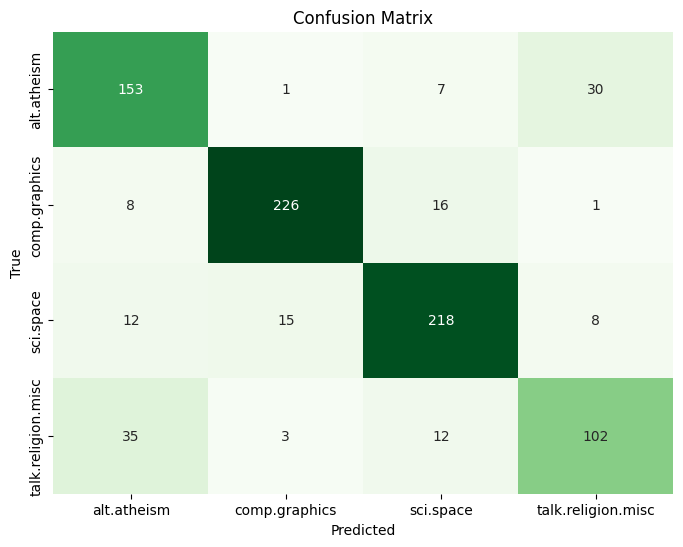

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Greens', cbar = False,xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()